# Taxi Trips Analysis Project

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## 1: Introduction

In [2]:
# Loading the dataset:
url = "C://Users//Andres//Desktop//AnyoneAI//Proyecto_Final//yellow_tripdata_2022-05.parquet"
df = pd.read_parquet(url, engine="fastparquet")

In [3]:
# We show the first 5 rows of the dataframe:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [4]:
# We show the shape of the dataframe and the data type of values in the columns:
print(df.shape)
print(df.dtypes)

(3588295, 19)
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object


In [5]:
# Check for missing values
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          129524
trip_distance                 0
RatecodeID               129524
store_and_fwd_flag       129524
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     129524
airport_fee              129524
dtype: int64

In [6]:
# We show some descriptive statistics of the numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,3588295.0,1.713103,1.0,1.0,2.0,2.0,6.0,0.488809
tpep_pickup_datetime,3588295,2022-05-16 07:50:29.219311616,2003-01-01 00:06:06,2022-05-08 18:14:16.500000,2022-05-16 09:14:42,2022-05-23 18:03:17,2022-06-01 23:55:30,NaN
tpep_dropoff_datetime,3588295,2022-05-16 08:08:42.275203072,2003-01-01 00:31:38,2022-05-08 18:32:36,2022-05-16 09:33:15,2022-05-23 18:21:03.500000,2022-06-02 00:03:51,NaN
passenger_count,3458771.0,1.393923,0.0,1.0,1.0,1.0,9.0,0.955549
trip_distance,3588295.0,6.856861,0.0,1.15,1.96,3.73,357192.65,690.848782
RatecodeID,3458771.0,1.365674,1.0,1.0,1.0,1.0,99.0,5.239789
PULocationID,3588295.0,164.573797,1.0,132.0,162.0,234.0,265.0,65.628132
DOLocationID,3588295.0,162.551711,1.0,113.0,162.0,234.0,265.0,70.279259
payment_type,3588295.0,1.183209,0.0,1.0,1.0,1.0,4.0,0.507599
fare_amount,3588295.0,15.168132,-1311.5,7.0,10.5,17.0,6966.5,14.89484


------

In [7]:
df[
    (df["tip_amount"] < 0)
    | (df["fare_amount"] < 0)
    | (df["extra"] < 0)
    | (df["mta_tax"] < 0)
]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
100,2,2022-05-01 00:46:22,2022-05-01 01:04:25,1.0,4.43,1.0,N,230,7,4,-16.50,-0.5,-0.5,0.00,0.0,-0.3,-20.30,-2.5,0.0
129,2,2022-05-01 00:31:38,2022-05-01 00:33:23,1.0,0.32,1.0,N,263,141,4,-3.50,-0.5,-0.5,0.00,0.0,-0.3,-7.30,-2.5,0.0
602,2,2022-05-01 00:44:58,2022-05-01 00:48:58,1.0,0.79,1.0,N,163,237,4,-5.00,-0.5,-0.5,0.00,0.0,-0.3,-8.80,-2.5,0.0
844,2,2022-05-01 00:48:28,2022-05-01 00:48:36,1.0,0.00,2.0,N,107,107,4,-52.00,0.0,-0.5,0.00,0.0,-0.3,-55.30,-2.5,0.0
884,2,2022-05-01 00:31:21,2022-05-01 00:33:08,1.0,0.67,1.0,N,263,141,4,-4.00,-0.5,-0.5,0.00,0.0,-0.3,-7.80,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571051,2,2022-05-26 15:17:09,2022-05-26 15:18:19,NaN,0.24,NaN,None,50,50,0,-31.28,0.0,0.5,4.30,0.0,0.3,-23.68,NaN,NaN
3571313,2,2022-05-26 16:20:04,2022-05-26 17:29:38,NaN,1.39,NaN,None,79,211,0,-94.29,0.0,0.5,15.79,0.0,0.3,-75.20,NaN,NaN
3582832,2,2022-05-30 01:18:00,2022-05-30 01:36:00,NaN,0.93,NaN,None,209,79,0,-19.40,0.0,0.5,0.00,0.0,0.3,-16.10,NaN,NaN
3583663,2,2022-05-30 12:02:00,2022-05-30 12:47:00,NaN,4.00,NaN,None,263,125,0,-33.58,0.0,0.5,0.00,0.0,0.3,-30.28,NaN,NaN


There're 20692 records with negative numerical values.

--------

`Total_amount:` The total amount charged to passengers. Does not include cash tips.

Can't be negative or extremely high.

In [8]:
df["total_amount"].value_counts().sort_values()

total_amount
149.56        1
111.84        1
116.32        1
142.00        1
155.06        1
          ...  
12.30     48551
10.30     48843
10.80     50237
11.80     50487
11.30     50995
Name: count, Length: 14379, dtype: int64

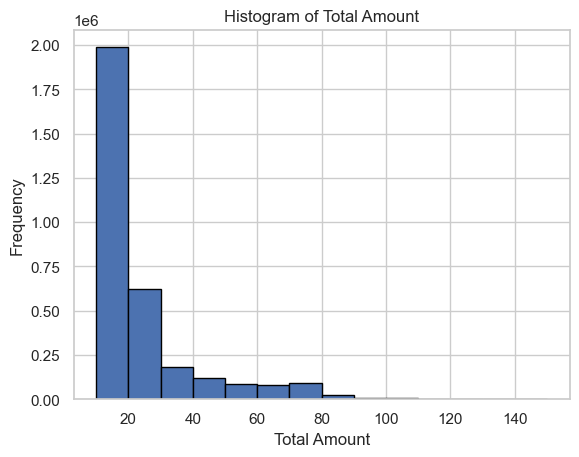

In [9]:
# We create a histogram of the 'total amount' column:
plt.hist(
    df["total_amount"],
    bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150],
    edgecolor="black",
)
plt.title("Histogram of Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()

`Congestion_Surcharge:` Total amount collected in trip for NYS congestion surcharge.

The rate depends on the type of vehicle used to provide transportation in or through the congestion zone. The surcharge is generally:

- $2.75 for each for-hire transportation trip in a vehicle that is not a medallion taxicab or a pool vehicle.
- $2.50 per trip when the transportation is provided by a medallion taxicab vehicle.
- $0.75 per pool trip.

This amount is required to be passed through to passengers and reported separately on any receipt given to the passenger.  

In [10]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 2.50    3174755
 0.00     267509
-2.50      16485
 2.75         10
 0.75          9
-0.75          2
 1.00          1
Name: count, dtype: int64

`Airport_fee:` $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.

So it should be either $1.25 or 0. Other values to be considered as mistake.

In [11]:
df["airport_fee"].value_counts()

airport_fee
 0.00    3175153
 1.25     281317
-1.25       2301
Name: count, dtype: int64

``Improvement_surcharge:`` $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

So it should be either 0.30 or 0. Other values to be considered as mistake.

In [12]:
df["improvement_surcharge"].value_counts()

improvement_surcharge
 0.3    3566256
-0.3      20663
 0.0       1376
Name: count, dtype: int64

``MTA_tax:`` $0.50 MTA tax that is automatically triggered based on the metered rate in use.

Should be either 0 or 0.5

In [13]:
df["mta_tax"].value_counts()

mta_tax
 0.50    3530087
 0.00      38227
-0.50      19969
 3.30          2
 0.07          2
 2.80          1
 0.11          1
-0.07          1
 0.26          1
 0.35          1
 0.12          1
 0.10          1
 0.08          1
Name: count, dtype: int64

``Extra:`` Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

Should be either 0.5, 1 or 0

In [14]:
df["extra"].value_counts()

extra
0.00    1478115
0.50     649518
2.50     506543
1.00     441814
3.00     235008
         ...   
0.05          1
4.80          1
2.51          1
8.55          1
4.82          1
Name: count, Length: 61, dtype: int64

`Fare_amount:` The time-and-distance fare calculated by the meter.

The fare can be different, but it can't be less than 0 or astronomicaly high.


In [15]:
df["fare_amount"].sort_values()

2536784   -1311.5
1779648    -900.0
2345183    -576.0
1595148    -535.0
1636750    -500.0
            ...  
3248725     855.0
1779649     900.0
1788460     900.0
2536785    1311.5
3414224    6966.5
Name: fare_amount, Length: 3588295, dtype: float64

`Tolls_amount:` Total amount of all tolls paid in trip.

Can't be negative

In [16]:
df["tolls_amount"].sort_values()

2292202    -50.75
791592     -47.00
297347     -45.00
2345183    -40.30
1163481    -38.55
            ...  
3193077     99.25
864403     109.70
32607      239.13
1924093    685.58
2349147    813.75
Name: tolls_amount, Length: 3588295, dtype: float64

`Tip_amount:` This field is automatically populated for credit card tips. Cash tips are not included.

Can't be negative

In [17]:
df["tip_amount"].sort_values()

3320234   -145.70
2124407    -89.96
3273841    -88.08
1904862    -75.00
1055074    -62.84
            ...  
765043     300.00
2499800    300.00
3146700    300.01
2720989    408.00
3107847    665.00
Name: tip_amount, Length: 3588295, dtype: float64

`Payment_type:` A numeric code signifying how the passenger paid for the trip. 

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute
- 5= Unknown
- 6= Voided trip

In [18]:
df.payment_type.value_counts()

payment_type
1    2720127
2     706333
0     129524
3      16333
4      15978
Name: count, dtype: int64

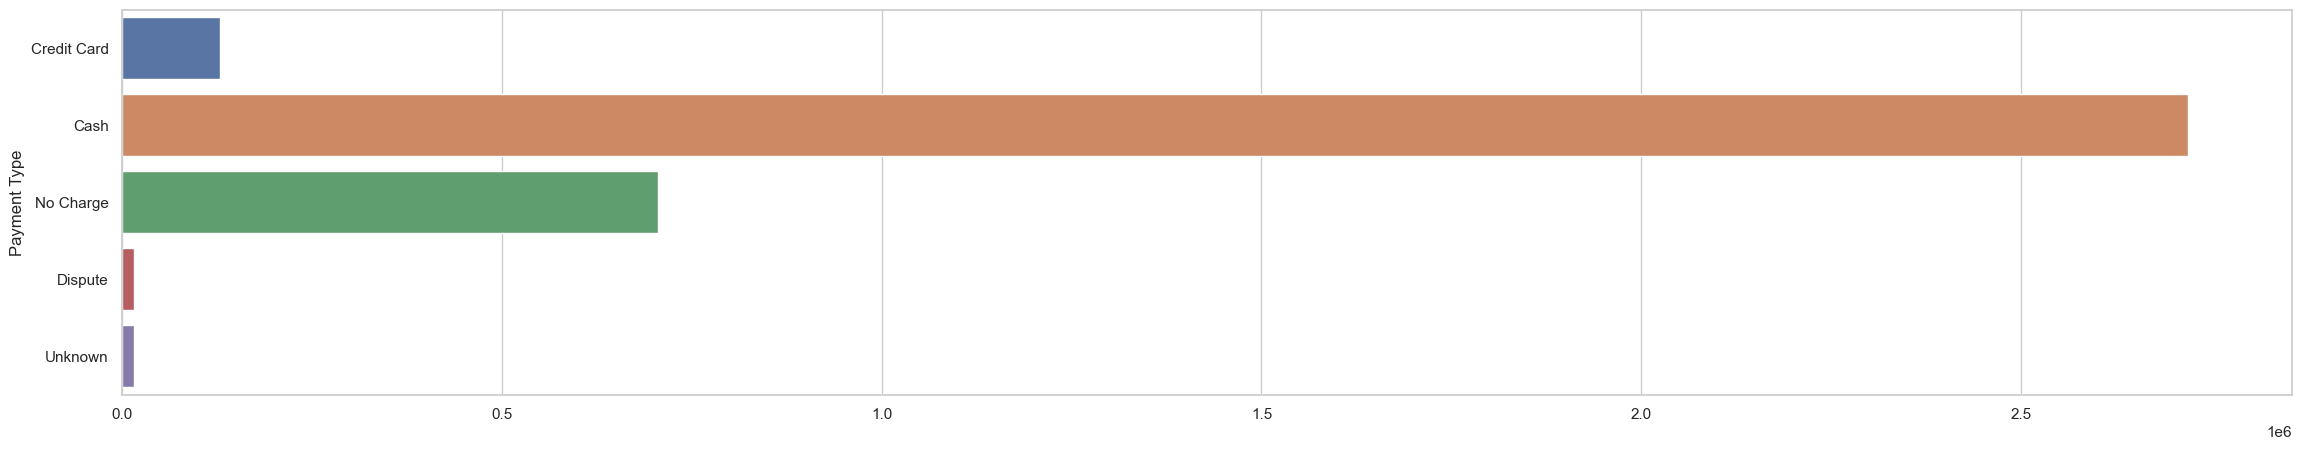

In [19]:
plt.figure(figsize=(28, 5))
sns.countplot(data=df, y="payment_type", orient="h")
plt.yticks(np.arange(5), ["Credit Card", "Cash", "No Charge", "Dispute", "Unknown"])
plt.ylabel("Payment Type")
plt.xlabel(None)
plt.show()

`Trip_distance:` The elapsed trip distance in miles reported by the taximeter.

If measured correctly it shouldn't be equal to 0 or astronomicaly high.

It can also be strange comparing to starting-ending time of the trip (1 hour long trip and 200 miles)


In [20]:
df.trip_distance.sort_values()

482906          0.00
427332          0.00
698193          0.00
2431890         0.00
3234863         0.00
             ...    
3543592    275692.34
3482491    281179.94
3469281    333632.96
3543875    344408.48
3528934    357192.65
Name: trip_distance, Length: 3588295, dtype: float64

In [21]:
df[df["trip_distance"] > 1000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
430036,2,2022-05-05 06:03:36,2022-05-05 06:14:37,1.0,29445.65,5.0,N,263,107,1,12.06,0.0,0.5,1.18,0.0,0.3,16.54,2.5,0.0
1656265,2,2022-05-15 15:28:26,2022-05-15 15:33:03,1.0,6474.93,1.0,N,263,262,2,0.00,0.0,-0.5,0.00,0.0,-0.3,-3.30,-2.5,0.0
1656266,2,2022-05-15 15:28:26,2022-05-15 15:33:03,1.0,6474.93,1.0,N,263,262,2,0.00,0.0,0.5,0.00,0.0,0.3,3.30,2.5,0.0
2463414,2,2022-05-22 13:43:22,2022-05-22 13:57:30,1.0,7496.85,1.0,N,237,170,1,40.50,0.0,0.5,8.76,0.0,0.3,52.56,2.5,0.0
3226642,2,2022-05-29 15:02:46,2022-05-29 15:08:35,3.0,2946.95,1.0,N,237,43,2,48.00,0.0,0.5,0.00,0.0,0.3,51.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584552,2,2022-05-30 18:22:00,2022-05-30 18:37:00,NaN,128742.58,NaN,None,229,145,0,13.31,0.0,0.5,1.00,0.0,0.3,17.61,NaN,NaN
3585670,2,2022-05-31 07:59:00,2022-05-31 08:28:00,NaN,131884.34,NaN,None,167,41,0,20.43,0.0,0.5,0.00,0.0,0.3,21.23,NaN,NaN
3585679,2,2022-05-31 07:44:00,2022-05-31 08:04:00,NaN,109774.82,NaN,None,42,50,0,28.30,0.0,0.5,7.01,0.0,0.3,38.61,NaN,NaN
3588029,2,2022-05-31 20:17:00,2022-05-31 20:43:00,NaN,45022.68,NaN,None,33,68,0,20.73,0.0,0.5,5.34,0.0,0.3,29.37,NaN,NaN


In [22]:
# Showing rows with any distance data equals to 0:
df[(df["trip_distance"] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.20,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
25,1,2022-05-01 00:16:00,2022-05-01 00:16:00,1.0,0.0,1.0,N,142,264,2,6.00,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
246,1,2022-05-01 00:17:06,2022-05-01 00:17:25,1.0,0.0,5.0,Y,229,229,2,75.00,0.0,0.0,0.00,0.0,0.3,75.30,0.0,0.0
330,1,2022-05-01 00:12:49,2022-05-01 00:29:29,1.0,0.0,1.0,N,152,241,1,29.20,0.0,0.5,0.00,0.0,0.3,30.00,0.0,0.0
472,1,2022-05-01 00:53:02,2022-05-01 00:53:47,1.0,0.0,1.0,N,230,230,3,2.50,3.0,0.5,0.00,0.0,0.3,6.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587292,2,2022-05-31 17:46:00,2022-05-31 17:51:00,NaN,0.0,NaN,None,13,13,0,19.56,0.0,0.5,5.07,0.0,0.3,27.93,NaN,NaN
3587910,2,2022-05-31 19:02:47,2022-05-31 19:02:57,NaN,0.0,NaN,None,140,140,0,23.33,0.0,0.5,5.91,0.0,0.3,32.54,NaN,NaN
3587927,2,2022-05-31 19:25:00,2022-05-31 19:25:09,NaN,0.0,NaN,None,224,224,0,15.36,0.0,0.5,4.13,0.0,0.3,22.79,NaN,NaN
3588054,2,2022-05-31 21:18:44,2022-05-31 21:19:03,NaN,0.0,NaN,None,50,50,0,10.00,0.0,0.5,1.00,0.0,0.3,14.30,NaN,NaN


`Store_and_fwd_flag:` This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

- Y= store and forward trip
- N= not a store and forward trip

In [23]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    3404113
Y      54658
Name: count, dtype: int64

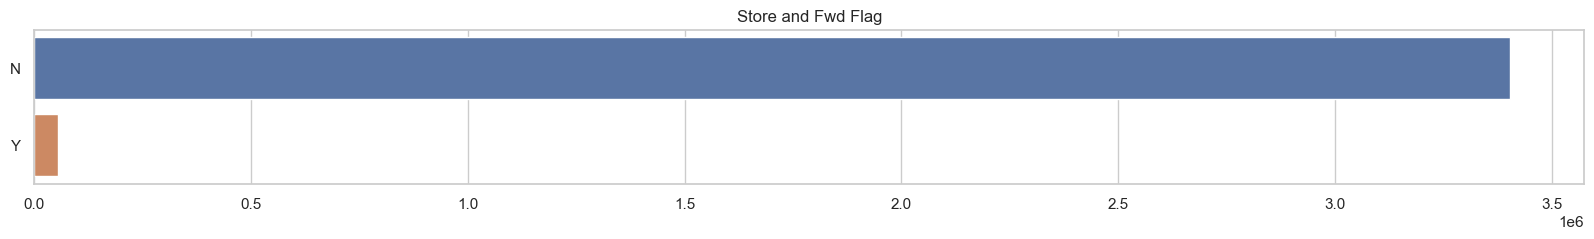

In [24]:
plt.figure(figsize=(20, 2))
sns.countplot(data=df, y="store_and_fwd_flag", orient="h")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Store and Fwd Flag")
plt.show()

`RateCodeID:` The final rate code in effect at the end of the trip.

1. Standard rate
2. JFK
3. Newark
4. Nassau or Westchester
5. Negotiated fare
6. Group ride

In [25]:
df.RatecodeID.value_counts()

RatecodeID
1.0     3256985
2.0      147239
5.0       28382
3.0       11636
99.0       9864
4.0        4626
6.0          39
Name: count, dtype: int64

99 is not a value compatible with the description.

`Passenger_count:` The number of passengers in the vehicle. This is a driver-entered value.

0 passengers considered as mistake

In [26]:
df["passenger_count"].value_counts()

passenger_count
1.0    2549880
2.0     539027
3.0     136997
0.0      73587
5.0      61209
4.0      56092
6.0      41948
7.0         15
8.0         14
9.0          2
Name: count, dtype: int64

`VendorID:` A code indicating the TPEP provider that provided the record. 

- 1= Creative Mobile Technologies, LLC 
- 2= VeriFone Inc.

We only have two options, therefore, any other number is considered an error.

In [27]:
df["VendorID"].value_counts()

VendorID
2    2527997
1    1054130
6       6154
5         14
Name: count, dtype: int64

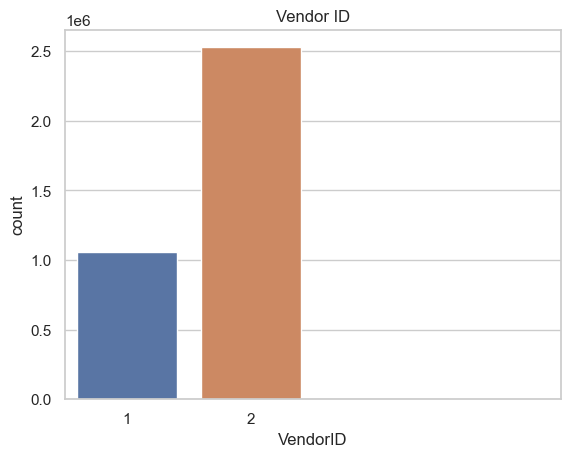

In [28]:
sns.countplot(data=df, x="VendorID")
plt.xticks([0, 1], ["1", "2"])
plt.title("Vendor ID")
plt.show()

------------

Negative to non-negative

In [29]:
import geopandas as gpd

# Read the shapefile
url_location = "C://Users//Andres//Desktop//AnyoneAI//Proyecto_Final//taxi_zones.zip"
gdf = gpd.read_file(url_location)

# Print the first few rows of the GeoDataFrame
gdf

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [30]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int64   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int64   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB


In [31]:
# Agregar columnas 'PUZone' y 'DOZone' en df
# df["PUZone"] = df["PULocationID"]
# df["DOZone"] = df["DOLocationID"]

# Combinar df y gdf utilizando 'LocationID' como clave
df = df.merge(
    gdf[["LocationID", "geometry"]],
    how="left",
    left_on="PULocationID",
    right_on="LocationID",
)
df.rename(columns={"geometry": "PUZone"}, inplace=True)

df = df.merge(
    gdf[["LocationID", "geometry"]],
    how="left",
    left_on="DOLocationID",
    right_on="LocationID",
)
df.rename(columns={"geometry": "DOZone"}, inplace=True)

# Eliminar columnas adicionales
df.drop(["LocationID_x", "LocationID_y"], axis=1, inplace=True)

In [32]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,...,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0,"POLYGON ((983031.177 217138.506, 983640.320 21...","POLYGON ((994298.215 228195.015, 994169.550 22..."
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,...,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0,"POLYGON ((992877.880 225627.534, 992741.735 22...","MULTIPOLYGON (((1002572.276 236761.574, 100256..."
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,...,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0,"POLYGON ((989412.663 219020.943, 990045.841 21...","POLYGON ((1011466.966 216463.005, 1011545.889 ..."
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,...,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0,"POLYGON ((988746.067 202151.955, 988733.885 20...","POLYGON ((1024471.434 243118.562, 1023619.071 ..."
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,...,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0,"POLYGON ((992877.880 225627.534, 992741.735 22...","POLYGON ((1000577.175 228028.553, 1001238.138 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589455,2,2022-05-31 23:40:19,2022-06-01 00:01:20,NaN,0.00,NaN,None,36,181,0,...,0.0,0.5,1.00,0.0,0.3,22.77,NaN,NaN,"POLYGON ((1008497.035 195728.645, 1008702.936 ...","POLYGON ((990954.947 181851.707, 990815.590 18..."
3589456,2,2022-05-31 23:52:12,2022-06-01 00:06:40,NaN,2.91,NaN,None,144,256,0,...,0.0,0.0,2.51,0.0,0.3,16.99,NaN,NaN,"POLYGON ((985411.760 200369.518, 985342.573 20...","POLYGON ((995798.638 199155.970, 996223.601 19..."
3589457,2,2022-05-31 23:27:00,2022-05-31 23:48:00,NaN,3.96,NaN,None,161,145,0,...,0.0,0.5,0.00,0.0,0.3,17.84,NaN,NaN,"POLYGON ((991081.026 214453.698, 990952.644 21...","POLYGON ((999916.846 213275.139, 1000066.513 2..."
3589458,2,2022-05-31 23:34:12,2022-06-01 00:00:13,NaN,6.27,NaN,None,145,17,0,...,0.0,0.5,5.54,0.0,0.3,30.35,NaN,NaN,"POLYGON ((999916.846 213275.139, 1000066.513 2...","POLYGON ((1000036.904 194829.434, 1000276.454 ..."


In [33]:
df_subset = df.sample(100, random_state=42)

In [40]:
df_subset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone,PUZone_coordinates,DOZone_coordinates
747217,1,2022-05-07 17:38:17,2022-05-07 17:48:36,2.0,2.00,1.0,N,146,43,2,...,0.00,0.0,0.3,13.30,2.5,0.0,"POLYGON ((1001773.150 212217.427, 1001596.002 ...","POLYGON ((991852.973 217950.807, 991725.244 21...","[(1001773.1501222998, 212217.4267117083), (100...","[(991852.9733769447, 217950.80729070306), (991..."
68769,2,2022-05-01 18:00:02,2022-05-01 18:06:47,1.0,2.16,1.0,N,263,170,1,...,1.00,0.0,0.3,12.30,2.5,0.0,"POLYGON ((997493.323 220912.386, 997355.264 22...","POLYGON ((991999.299 210994.739, 991972.635 21...","[(997493.3227153122, 220912.38616232574), (997...","[(991999.2986085415, 210994.73883078992), (991..."
806088,2,2022-05-08 10:21:24,2022-05-08 10:49:53,1.0,12.39,1.0,N,170,178,2,...,0.00,0.0,0.3,39.80,2.5,0.0,"POLYGON ((991999.299 210994.739, 991972.635 21...","POLYGON ((992354.462 167321.878, 992446.939 16...","[(991999.2986085415, 210994.73883078992), (991...","[(992354.4621274918, 167321.8781399727), (9924..."
2624928,2,2022-05-24 00:23:17,2022-05-24 00:30:23,1.0,1.32,1.0,N,68,249,2,...,0.00,0.0,0.3,10.80,2.5,0.0,"POLYGON ((983690.405 209040.369, 983550.612 20...","POLYGON ((983555.319 204876.901, 983469.158 20...","[(983690.4048828036, 209040.3692367077), (9835...","[(983555.3191627562, 204876.90098667145), (983..."
802127,2,2022-05-08 08:26:33,2022-05-08 08:37:53,1.0,2.11,1.0,N,158,45,2,...,0.00,0.0,-0.3,-13.30,-2.5,0.0,"POLYGON ((982091.020 209596.704, 982318.344 20...","POLYGON ((984941.821 199431.157, 984958.446 19...","[(982091.0204822123, 209596.70449899137), (982...","[(984941.8213095665, 199431.15666553378), (984..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000486,2,2022-05-10 08:29:57,2022-05-10 08:40:11,1.0,1.19,1.0,N,140,236,1,...,1.20,0.0,0.3,13.00,2.5,0.0,"POLYGON ((995735.062 215619.835, 995670.105 21...","POLYGON ((995940.048 221122.920, 995812.322 22...","[(995735.0624100119, 215619.8353998661), (9956...","[(995940.0483185351, 221122.92042678595), (995..."
1215604,2,2022-05-11 21:32:34,2022-05-11 21:40:43,4.0,1.57,1.0,N,234,230,1,...,2.95,0.0,0.3,14.75,2.5,0.0,"POLYGON ((987029.847 207022.299, 987048.270 20...","POLYGON ((988786.877 214532.094, 988650.277 21...","[(987029.846865043, 207022.29914864898), (9870...","[(988786.8773103654, 214532.0940539986), (9886..."
1302120,2,2022-05-12 19:49:46,2022-05-12 20:00:27,1.0,1.69,1.0,N,41,238,2,...,0.00,0.0,0.3,13.30,2.5,0.0,"POLYGON ((998716.913 234240.397, 999458.736 23...","POLYGON ((992877.880 225627.534, 992741.735 22...","[(998716.9128961712, 234240.39717498422), (999...","[(992877.8795208782, 225627.5341552496), (9927..."
2579867,2,2022-05-23 16:09:46,2022-05-23 16:15:55,1.0,1.20,1.0,N,170,234,1,...,2.16,0.0,0.3,12.96,2.5,0.0,"POLYGON ((991999.299 210994.739, 991972.635 21...","POLYGON ((987029.847 207022.299, 987048.270 20...","[(991999.2986085415, 210994.73883078992), (991...","[(987029.846865043, 207022.29914864898), (9870..."


In [41]:
import plotly.graph_objects as go

# Datos de ejemplo
# df = your_dataframe  # Reemplaza "your_dataframe" con tu propio DataFrame

# Crear figuras de líneas
fig = go.Figure()

# Iterar sobre las filas del DataFrame y agregar líneas a la figura
for index, row in df_subset.iterrows():
    pu_zone = row["PUZone"]
    do_zone = row["DOZone"]

    if pu_zone is None or do_zone is None:
        continue

    if pu_zone.geom_type == "Polygon":
        pu_polygons = [pu_zone]
    elif pu_zone.geom_type == "MultiPolygon":
        pu_polygons = pu_zone.geoms

    if do_zone.geom_type == "Polygon":
        do_polygons = [do_zone]
    elif do_zone.geom_type == "MultiPolygon":
        do_polygons = do_zone.geoms

    for pu_polygon in pu_polygons:
        pu_coordinates = pu_polygon.exterior.coords[:]
        pu_lon = [coord[0] for coord in pu_coordinates]
        pu_lat = [coord[1] for coord in pu_coordinates]

        for do_polygon in do_polygons:
            do_coordinates = do_polygon.exterior.coords[:]
            do_lon = [coord[0] for coord in do_coordinates]
            do_lat = [coord[1] for coord in do_coordinates]

            fig.add_trace(
                go.Scattergeo(
                    lon=[pu_lon, do_lon],
                    lat=[pu_lat, do_lat],
                    mode="lines",
                    line=dict(width=1, color="red"),
                    opacity=1.0,
                )
            )

# Configuración del diseño del mapa
fig.update_layout(
    title_text="Rutas de viaje",
    showlegend=False,
    geo=dict(
        scope="usa",
        projection_type="albers usa",
        showland=True,
        landcolor="rgb(217, 217, 217)",
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)",
        coastlinecolor="rgb(255, 255, 255)",
        lataxis=dict(range=[40.55, 40.95]),
        lonaxis=dict(range=[-74.1, -73.75]),
        center=dict(lat=40.715, lon=-74),
        lonaxis_range=[-74.1, -73.75],
        lataxis_range=[40.55, 40.95],
    ),
)

# Mostrar el mapa
fig.show()

In [36]:
from shapely.geometry import Polygon, MultiPolygon


# Función para convertir un polígono en coordenadas de Folium
def convert_polygon_to_coordinates(polygon):
    if isinstance(polygon, Polygon):
        return list(polygon.exterior.coords)
    elif isinstance(polygon, MultiPolygon):
        coordinates = []
        for poly in polygon.geoms:
            coordinates.extend(list(poly.exterior.coords))
        return coordinates
    else:
        return []


# Convertir las coordenadas de las columnas 'PUZone' y 'DOZone' a formato de Folium
df_subset["PUZone_coordinates"] = df_subset["PUZone"].apply(
    lambda x: convert_polygon_to_coordinates(x)
)
df_subset["DOZone_coordinates"] = df_subset["DOZone"].apply(
    lambda x: convert_polygon_to_coordinates(x)
)

In [37]:
df_subset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone,PUZone_coordinates,DOZone_coordinates
747217,1,2022-05-07 17:38:17,2022-05-07 17:48:36,2.0,2.00,1.0,N,146,43,2,...,0.00,0.0,0.3,13.30,2.5,0.0,"POLYGON ((1001773.150 212217.427, 1001596.002 ...","POLYGON ((991852.973 217950.807, 991725.244 21...","[(1001773.1501222998, 212217.4267117083), (100...","[(991852.9733769447, 217950.80729070306), (991..."
68769,2,2022-05-01 18:00:02,2022-05-01 18:06:47,1.0,2.16,1.0,N,263,170,1,...,1.00,0.0,0.3,12.30,2.5,0.0,"POLYGON ((997493.323 220912.386, 997355.264 22...","POLYGON ((991999.299 210994.739, 991972.635 21...","[(997493.3227153122, 220912.38616232574), (997...","[(991999.2986085415, 210994.73883078992), (991..."
806088,2,2022-05-08 10:21:24,2022-05-08 10:49:53,1.0,12.39,1.0,N,170,178,2,...,0.00,0.0,0.3,39.80,2.5,0.0,"POLYGON ((991999.299 210994.739, 991972.635 21...","POLYGON ((992354.462 167321.878, 992446.939 16...","[(991999.2986085415, 210994.73883078992), (991...","[(992354.4621274918, 167321.8781399727), (9924..."
2624928,2,2022-05-24 00:23:17,2022-05-24 00:30:23,1.0,1.32,1.0,N,68,249,2,...,0.00,0.0,0.3,10.80,2.5,0.0,"POLYGON ((983690.405 209040.369, 983550.612 20...","POLYGON ((983555.319 204876.901, 983469.158 20...","[(983690.4048828036, 209040.3692367077), (9835...","[(983555.3191627562, 204876.90098667145), (983..."
802127,2,2022-05-08 08:26:33,2022-05-08 08:37:53,1.0,2.11,1.0,N,158,45,2,...,0.00,0.0,-0.3,-13.30,-2.5,0.0,"POLYGON ((982091.020 209596.704, 982318.344 20...","POLYGON ((984941.821 199431.157, 984958.446 19...","[(982091.0204822123, 209596.70449899137), (982...","[(984941.8213095665, 199431.15666553378), (984..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000486,2,2022-05-10 08:29:57,2022-05-10 08:40:11,1.0,1.19,1.0,N,140,236,1,...,1.20,0.0,0.3,13.00,2.5,0.0,"POLYGON ((995735.062 215619.835, 995670.105 21...","POLYGON ((995940.048 221122.920, 995812.322 22...","[(995735.0624100119, 215619.8353998661), (9956...","[(995940.0483185351, 221122.92042678595), (995..."
1215604,2,2022-05-11 21:32:34,2022-05-11 21:40:43,4.0,1.57,1.0,N,234,230,1,...,2.95,0.0,0.3,14.75,2.5,0.0,"POLYGON ((987029.847 207022.299, 987048.270 20...","POLYGON ((988786.877 214532.094, 988650.277 21...","[(987029.846865043, 207022.29914864898), (9870...","[(988786.8773103654, 214532.0940539986), (9886..."
1302120,2,2022-05-12 19:49:46,2022-05-12 20:00:27,1.0,1.69,1.0,N,41,238,2,...,0.00,0.0,0.3,13.30,2.5,0.0,"POLYGON ((998716.913 234240.397, 999458.736 23...","POLYGON ((992877.880 225627.534, 992741.735 22...","[(998716.9128961712, 234240.39717498422), (999...","[(992877.8795208782, 225627.5341552496), (9927..."
2579867,2,2022-05-23 16:09:46,2022-05-23 16:15:55,1.0,1.20,1.0,N,170,234,1,...,2.16,0.0,0.3,12.96,2.5,0.0,"POLYGON ((991999.299 210994.739, 991972.635 21...","POLYGON ((987029.847 207022.299, 987048.270 20...","[(991999.2986085415, 210994.73883078992), (991...","[(987029.846865043, 207022.29914864898), (9870..."


In [38]:
import folium
from folium.plugins import PolyLineTextPath

# Crear un mapa centrado en las coordenadas del primer punto de partida
first_pu_coordinates = df_subset["PUZone_coordinates"].iloc[0][0]
m = folium.Map(location=first_pu_coordinates, zoom_start=12)

# Iterar sobre cada fila del DataFrame
for index, row in df_subset.iterrows():
    # Obtener las coordenadas de los puntos de partida y llegada
    pu_coordinates = row["PUZone_coordinates"]
    do_coordinates = row["DOZone_coordinates"]

    # Verificar si las coordenadas son válidas
    if pu_coordinates and do_coordinates:
        # Crear una polilínea con los puntos de partida y llegada
        polyline = folium.PolyLine(
            locations=[pu_coordinates, do_coordinates], color="blue", weight=2
        )

        # Agregar la polilínea al mapa
        polyline.add_to(m)

# Mostrar el mapa interactivo
m

In [39]:
import folium

# Crear un mapa vacío
m = folium.Map(
    location=[40.7128, -74.0060], zoom_start=11
)  # Ajusta la ubicación y el nivel de zoom según tus datos

# Iterar sobre cada fila del dataframe y agregar una línea entre las ubicaciones de PUZone y DOZone
for index, row in df_subset.iterrows():
    pu_zone = row["PUZone_coordinates"]
    do_zone = row["DOZone_coordinates"]

    # Verificar si los valores de PUZone y DOZone son nulos
    if pu_zone is not None and do_zone is not None:
        # Obtener las coordenadas de los puntos de inicio y destino
        pu_latitude, pu_longitude = pu_zone.centroid.y, pu_zone.centroid.x
        do_latitude, do_longitude = do_zone.centroid.y, do_zone.centroid.x

        # Crear una línea entre los puntos de inicio y destino
        folium.PolyLine(
            locations=[(pu_latitude, pu_longitude), (do_latitude, do_longitude)],
            color="green",
        ).add_to(m)

        # Agregar marcadores para cada punto de inicio y destino
        folium.Marker([pu_latitude, pu_longitude], popup="PUZone_coordinates").add_to(m)
        folium.Marker([do_latitude, do_longitude], popup="DOZone_coordinates").add_to(m)

# Mostrar el mapa interactivo
m

AttributeError: 'list' object has no attribute 'centroid'

In [ ]:
import folium
from shapely.geometry import Polygon, MultiPolygon

# Crear un mapa vacío
m = folium.Map(
    location=[40.7128, -74.0060], zoom_start=11
)  # Ajusta la ubicación y el nivel de zoom según tus datos

# Iterar sobre cada fila del dataframe y agregar una línea entre las ubicaciones de PUZone y DOZone
for index, row in df_subset.iterrows():
    pu_zone = row["PUZone_coordinates"]
    do_zone = row["DOZone_coordinates"]

    # Verificar si los valores de PUZone y DOZone son nulos
    if pu_zone is not None and do_zone is not None:
        # Verificar si los polígonos son multipolígonos
        if isinstance(pu_zone, MultiPolygon):
            pu_polygons = pu_zone.geoms
        else:
            pu_polygons = [pu_zone]

        if isinstance(do_zone, MultiPolygon):
            do_polygons = do_zone.geoms
        else:
            do_polygons = [do_zone]

        # Crear una línea entre los puntos de inicio y destino
        for pu_polygon in pu_polygons:
            for do_polygon in do_polygons:
                folium.PolyLine(
                    locations=list(pu_polygon.exterior.coords)
                    + list(do_polygon.exterior.coords),
                    color="blue",
                ).add_to(m)

        # Agregar marcadores para cada punto de inicio y destino
        folium.Marker(
            list(pu_polygons[0].exterior.coords)[0][::-1], popup="PUZone_coordinates"
        ).add_to(m)
        folium.Marker(
            list(do_polygons[0].exterior.coords)[0][::-1], popup="DOZone_coordinates"
        ).add_to(m)

# Mostrar el mapa interactivo
m